# Working with Neighborhoods

In [1]:
import cv2
import matplotlib.pyplot as plt

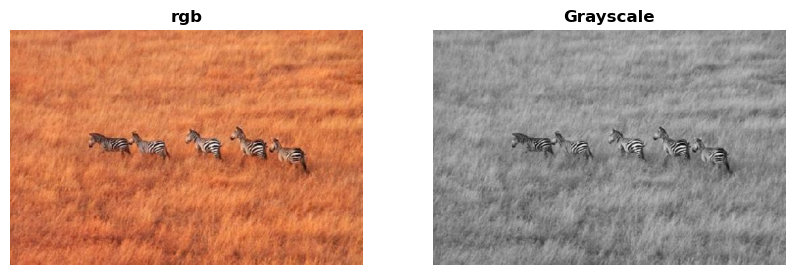

In [2]:
zebra = cv2.imread("./images/zebras.jpg")
zebra = cv2.cvtColor(zebra, cv2.COLOR_BGR2RGB)
zebra_gray = cv2.cvtColor(zebra, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(zebra)
axs[0].axis('off')
axs[0].set_title('rgb')
axs[1].imshow(zebra_gray, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Grayscale')
plt.show()

Apply a range filter.

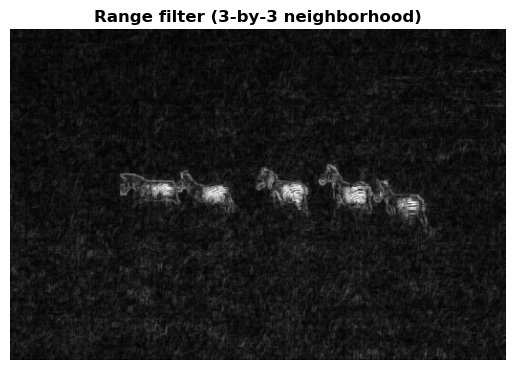

In [3]:
# http://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f
zebra_range = cv2.morphologyEx(zebra_gray, cv2.MORPH_GRADIENT, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(3, 3)))

plt.imshow(zebra_range, cmap='gray')
plt.title('Range filter (3-by-3 neighborhood)')
plt.axis('off')
plt.show()

The default 3-by-3 neighborhood was a bit too small. We can see some dark spots in the zebras where the neighborhood was completely contained within a stripe and did not detect variation. Let's increse the neighborhood size.

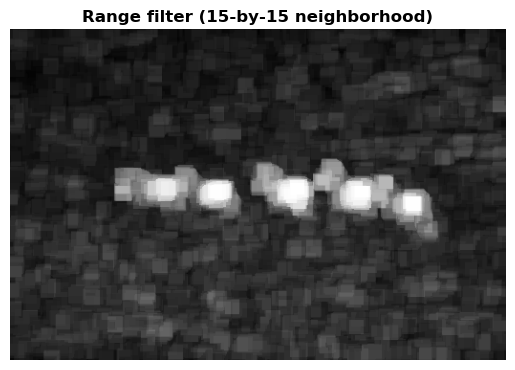

In [4]:
# http://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f
zebra_range = cv2.morphologyEx(zebra_gray, cv2.MORPH_GRADIENT, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(15, 15)))

plt.imshow(zebra_range, cmap='gray')
plt.title('Range filter (15-by-15 neighborhood)')
plt.axis('off')
plt.show()

A 15-by-15 neighborhood was too large. We can see that the bright areas identifying the zebras are too clunky. This would result in an over-segmentation.

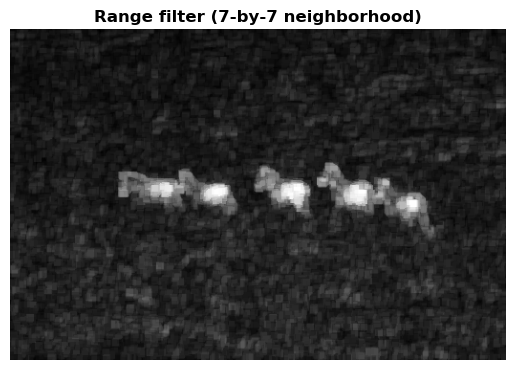

In [5]:
# http://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f
zebra_range = cv2.morphologyEx(zebra_gray, cv2.MORPH_GRADIENT, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(7, 7)))

plt.imshow(zebra_range, cmap='gray')
plt.title('Range filter (7-by-7 neighborhood)')
plt.axis('off')
plt.show()

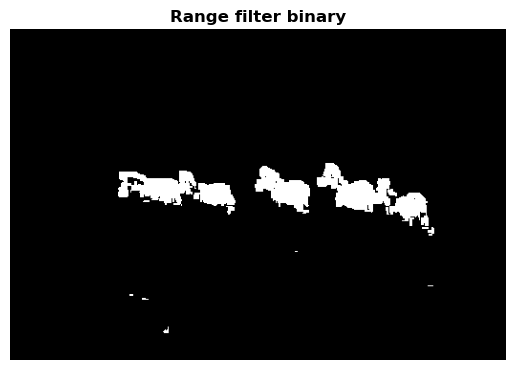

In [6]:
_, zebra_range_binary = cv2.threshold(zebra_range, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

plt.imshow(zebra_range_binary, cmap='gray')
plt.title('Range filter binary')
plt.axis('off')
plt.show()